# importing the libraries

In [ ]:
pip install imbalanced-learn

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
# importing the data as pandas
card_data=pd.read_csv("C:\\Users\\krish\\OneDrive\\Desktop\\data science\\projects\\card fraud detection\\creditcard.csv")
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# dataset information
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# checking wheather the dataset have any null values in the coloumns
card_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# getting the no of denunine and fraud transactions(0 indicates genuine ones and 1 indicates the fraud ones)
card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

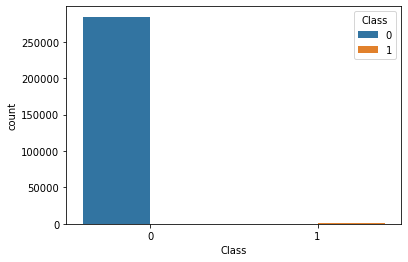

In [33]:
#plotting with seaborn the unbalanced data
sns.countplot(x='Class',hue='Class',data=card_data)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

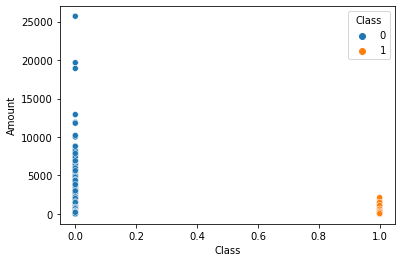

In [32]:
sns.scatterplot(data=card_data, x="Class", y="Amount",hue='Class')

#### the dataset is highly unbalanced and we need tomake it balance other wise the model will biased 

In [7]:
# spliting the dataset into two
x=card_data.drop('Class',axis=1)
y=card_data["Class"]
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#comparing the values of the class variable
card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [83]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4,stratify=y)

<AxesSubplot:xlabel='Class', ylabel='count'>

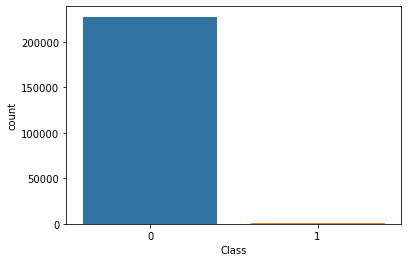

In [86]:
#plotting with seaborn the unbalanced data
sns.countplot(y_train)

In [45]:
LR=LogisticRegression()


In [46]:
LR.fit(x_train,y_train)

C:\Users\krish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_predict=LR.predict(x_test)

In [49]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
test_data_accuracy=accuracy_score(y_predict,y_test)

In [51]:
print('accuracy of test data:',test_data_accuracy)

accuracy of test data: 0.9990871107053826


In [55]:
from sklearn.metrics import  classification_report
print('classification report:\n',classification_report(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.68      0.72        98

    accuracy                           1.00     56962
   macro avg       0.88      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962

f1 score: 0.7204301075268817


### SMOTE used over the balancing the dataset

In [56]:
s= SMOTE(sampling_strategy='minority')
x_sm,y_sm=s.fit_resample(x_train,y_train)

In [57]:
y_sm.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

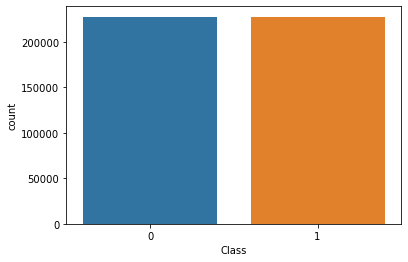

In [58]:
#plotting with seaborn the balanced data
sns.countplot(y_sm)

In [59]:
x_train, x_test, y_train, y_test = train_test_split( x_sm, y_sm, test_size=0.2, random_state=4,stratify=y_sm)

In [60]:
LR=LogisticRegression()


In [76]:
LR.fit(x_train,y_train)

C:\Users\krish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
y_predict=LR.predict(x_test)

In [78]:
y_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
test_data_accuracy=accuracy_score(y_predict,y_test)

In [80]:
print('accuracy of test data:',test_data_accuracy)

accuracy of test data: 0.9758301183763642


In [81]:
from sklearn.metrics import  classification_report
print('classification report:\n',classification_report(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     45491
           1       0.99      0.97      0.98     45490

    accuracy                           0.98     90981
   macro avg       0.98      0.98      0.98     90981
weighted avg       0.98      0.98      0.98     90981

f1 score: 0.9755745370936032
